In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,auc

In [42]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

Exploratory Data Analysis

In [17]:
telco=pd.read_csv('Churn.csv')
telco.head()


,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [18]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [19]:
telco['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [20]:
print(telco.groupby('Churn')['CustServ_Calls','Vmail_Message'].mean())
print(telco.groupby('Churn')['CustServ_Calls','Vmail_Message'].std())

       CustServ_Calls  Vmail_Message
Churn                               
no           1.449825       8.604561
yes          2.229814       5.115942
       CustServ_Calls  Vmail_Message
Churn                               
no           1.163883      13.913125
yes          1.853275      11.860138


In [28]:
#pd.set_option('display.max_rows', None)
#pd.reset_option('^display.', silent=True)
telco.groupby('State')['Churn'].value_counts()

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
                ..
WI     yes       7
WV     no       96
       yes      10
WY     no       68
       yes       9
Name: Churn, Length: 102, dtype: int64

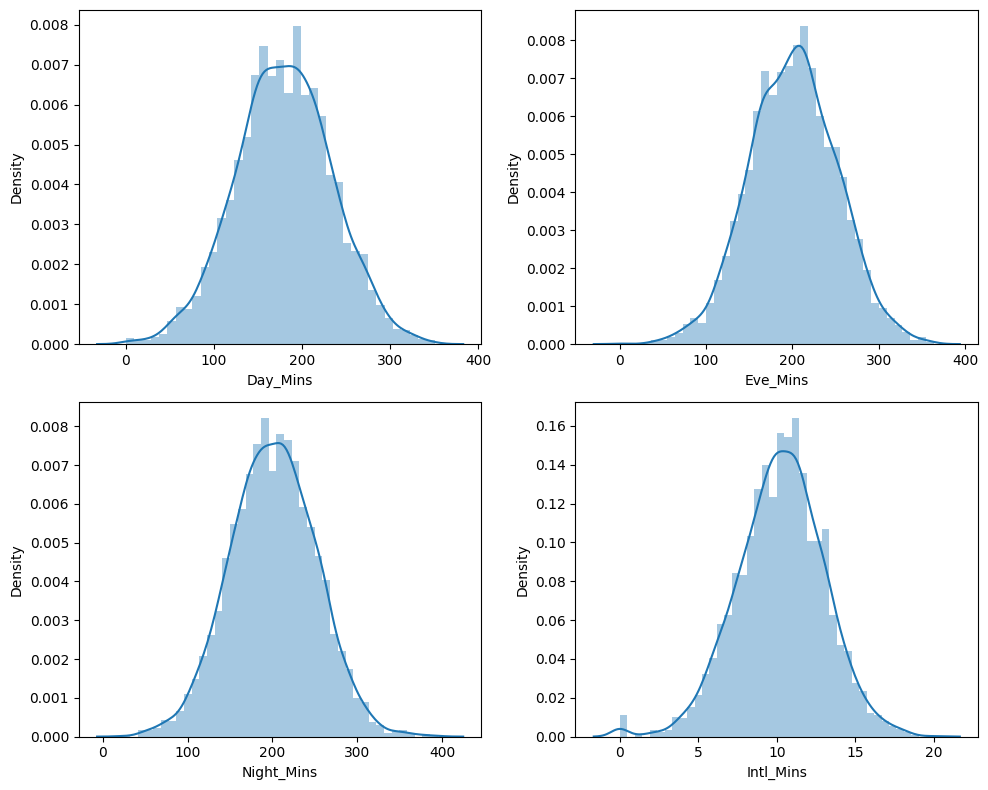

In [49]:
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.distplot(telco['Day_Mins'],ax=axs[0,0])
sns.distplot(telco['Eve_Mins'],ax=axs[0,1])
sns.distplot(telco['Night_Mins'],ax=axs[1,0])
sns.distplot(telco['Intl_Mins'],ax=axs[1,1])


plt.tight_layout()
plt.show()

<Axes: xlabel='Churn', ylabel='CustServ_Calls'>

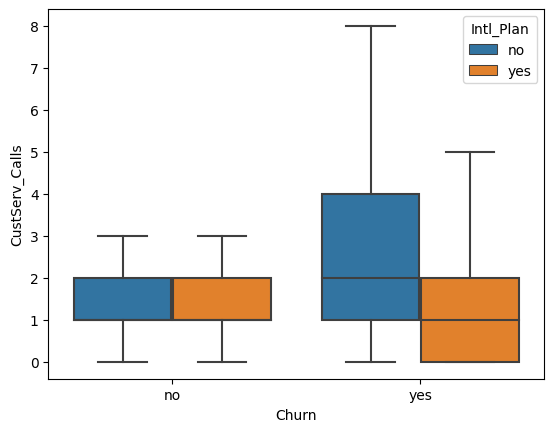

In [50]:
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Intl_Plan")

Preprocessing

In [74]:
telco['Vmail_Plan'].replace(['no','yes'],[0,1],inplace=True)
telco['Intl_Plan'].replace(['no','yes'],[0,1],inplace=True)
telco['Churn'].replace(['no','yes'],[0,1],inplace=True)
telco[['Vmail_Plan','Churn','Intl_Plan']].head()

,Vmail_Plan,Churn,Intl_Plan
0,1,0,0
1,1,0,0
2,0,0,0
3,0,0,1
4,0,0,1


In [56]:
telco_state=pd.get_dummies(telco['State'],drop_first=True)
telco_state.head()

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
Scaler=StandardScaler()
telco_scaled=Scaler.fit_transform(telco[['Night_Mins','Intl_Calls']])
telco_scaled=pd.DataFrame(telco_scaled,columns=['Night_Mins','Intl_Calls'])
telco_scaled.describe() 

,Night_Mins,Intl_Calls
count,3.333000e+03,3.333000e+03
mean,7.887813e-17,-8.527366e-18
std,1.000150e+00,1.000150e+00
min,-3.513648e+00,-1.820289e+00
25%,-6.698545e-01,-6.011951e-01
50%,6.485803e-03,-1.948306e-01
75%,6.808485e-01,6.178983e-01
max,3.839081e+00,6.307001e+00


In [67]:
telco.drop(['Area_Code','Phone','State'],axis=1,inplace=True)
telco.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'Avg_Night_Calls'],
      dtype='object')

In [66]:
#creating new features
telco['Avg_Night_Calls'] = telco['Night_Mins']/telco['Night_Calls']
telco['Avg_Night_Calls'].head()

0    2.689011
1    2.469903
2    1.563462
3    2.212360
4    1.544628
Name: Avg_Night_Calls, dtype: float64

In [77]:
#0              91             23     232.4     186.0       190.5  ...       15.81          128          8.57           3         3.32
telco.dtypes

Account_Length       int64
Vmail_Message        int64
Day_Mins           float64
Eve_Mins           float64
Night_Mins         float64
Intl_Mins          float64
CustServ_Calls       int64
Churn                int64
Intl_Plan            int64
Vmail_Plan           int64
Day_Calls            int64
Day_Charge         float64
Eve_Calls            int64
Eve_Charge         float64
Night_Calls          int64
Night_Charge       float64
Intl_Calls           int64
Intl_Charge        float64
Avg_Night_Calls    float64
dtype: object

0    2850
1     483
Name: Churn, dtype: int64


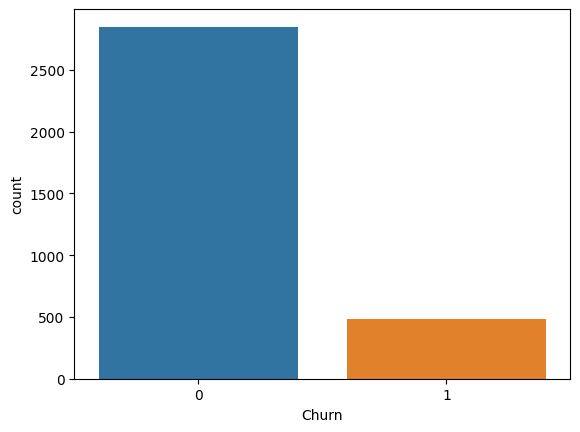

In [75]:
#checking class imbalance
print(telco['Churn'].value_counts())
sns.countplot(x='Churn',data=telco)
plt.show()

In [83]:
#splitting features and target
X=telco.drop('Churn',axis=1)
y=telco['Churn']

In [84]:
#Oversampling the minority class Using SMOTE
smote=SMOTE(sampling_strategy='auto',random_state=42)
X_resampled,y_resampled=smote.fit_resample(X,y)


In [85]:
#standardizing the features
countinuous_features=['Account_Length','Vmail_Message','Day_Mins','Eve_Mins','Night_Mins','Intl_Mins','CustServ_Calls','Avg_Night_Calls','Day_Calls','Day_Charge','Eve_Calls','Eve_Charge','Night_Calls','Night_Charge','Intl_Calls','Intl_Charge']
X_countinuous=X_resampled[countinuous_features]
X_countinuous_scaled=Scaler.fit_transform(X_countinuous)
X_resampled[countinuous_features]=X_countinuous_scaled

In [86]:
X_resampled.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Avg_Night_Calls
0,0.694089,1.498116,1.206222,-0.173222,0.886697,-0.174042,-0.481201,0,1,0.466856,1.206462,-0.068586,-0.173028,-0.474084,0.885899,-0.509113,-0.174819,0.874374
1,0.146936,1.579511,-0.488247,-0.211137,1.089134,1.246298,-0.481201,0,1,1.135947,-0.488486,0.144926,-0.210592,0.171416,1.089950,-0.509113,1.246976,0.546893
2,0.928584,-0.536747,0.850957,-1.693812,-0.826711,0.670484,-1.181085,0,0,0.672730,0.851101,0.518571,-1.694356,0.225208,-0.825344,0.342771,0.664040,-0.807882
3,-0.452327,-0.536747,1.767771,-2.877158,-0.110878,-1.479218,0.218683,1,0,-1.540417,1.767913,-0.655743,-2.877612,-0.581667,-0.111167,1.194655,-1.482870,0.161966
4,-0.686822,-0.536747,-0.404752,-1.153025,-0.319576,-0.135654,0.918567,1,0,0.621261,-0.404701,1.159106,-1.152031,1.139666,-0.319855,-0.509113,-0.132165,-0.836031


In [87]:
#splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)

In [109]:
#Test Different Models Using RandomizedSearchCV

models={
    'DesisionTree':(DecisionTreeClassifier(),{'max_depth':[None,5,10,15],'min_samples_split':[2,5,10,15],'min_samples_leaf':[1,2,5,10]}),
    'RandomForest':(RandomForestClassifier(),{'n_estimators':[50,100,150,200],'max_depth':[None,5,10,15],'min_samples_split':[5,10,15],'min_samples_leaf':[2,5,10]}),
    'SVC':(SVC(probability=True),{'kernel':['linear','rbf'],'C':[0.1,1,10,100],'gamma':[0.1,1,10,100]}),   
}

best_model={}
for model_name,(model,params)in models.items():
    random_search=RandomizedSearchCV(
        model,
        param_distributions=params,
        n_iter=10,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=2
    )
    random_search.fit(X_train,y_train)
    best_model[model_name]=random_search.best_estimator_

for model_name,model in best_model.items():
    print(f"Model {model_name}, Score {model.score(X_test,y_test)}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model DesisionTree, Score 0.8444444444444444
Model RandomForest, Score 0.9046783625730994
Model SVC, Score 0.9298245614035088


In [110]:
#Evaluating best model (SVC) on test data
print(f"Best parametes for SVC Model={best_model['SVC']}")
y_pred=best_model['SVC'].predict(X_test)


#classification report
print(classification_report(y_test,y_pred))




Best parametes for SVC Model=SVC(C=10, gamma=0.1, probability=True)
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       882
           1       0.91      0.96      0.93       828

    accuracy                           0.93      1710
   macro avg       0.93      0.93      0.93      1710
weighted avg       0.93      0.93      0.93      1710



Roc_auc_score:0.9766286546824849


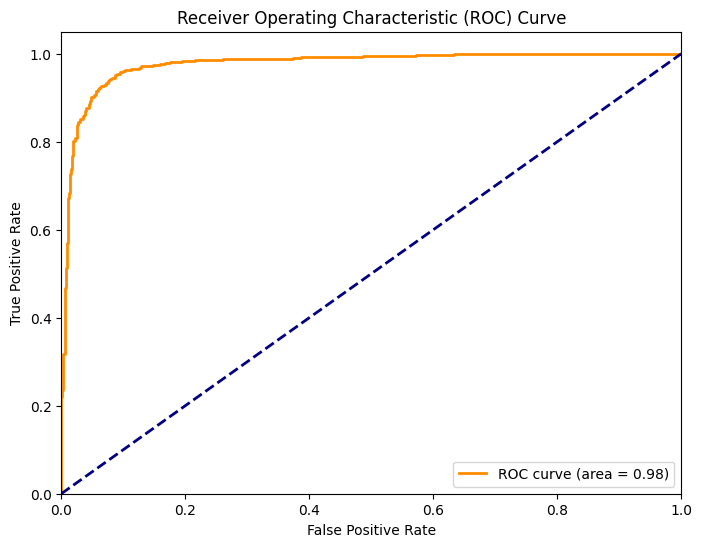

In [114]:
#ROC Curve
y_prob=best_model['SVC'].predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)
print(f"Roc_auc_score:{roc_auc_score(y_test, y_prob)}")
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

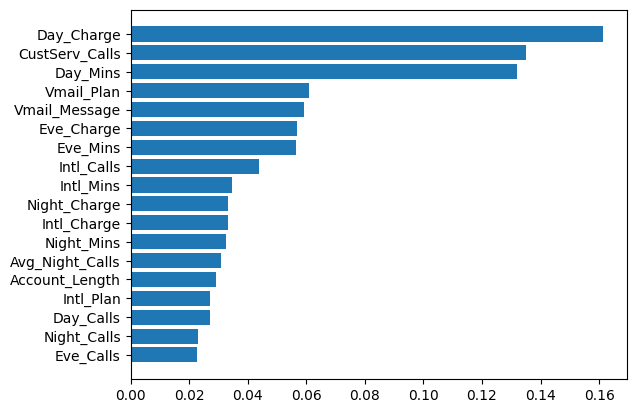

In [119]:
#checking the feature importance using Random Forest
importance=best_model['RandomForest'].feature_importances_
sorted_idx = np.argsort(importance)
plt.barh(X.columns[sorted_idx],importance[sorted_idx])
plt.show()